# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
import pandas as pd
import requests
import numpy as np
from citipy import citipy

# Set the API base URL and API key
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_api_key = "c3e81dfa75939c30978fdbd94f09750f"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city and continue to the next one
    except:
        print(f"City '{city}' not found. Skipping...")
        continue

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Number of cities in the list: 632
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | magadan
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | masjed soleyman
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ketchikan
Processing Record 11 of Set 1 | taiohae
City 'taiohae' not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | conception bay south
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | ulsteinvik
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64


In [9]:
# Display sample data
print(city_data_df.head())

                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0               adamstown -25.0660 -130.1015     67.33        60          26   
1       port-aux-francais -49.3500   70.2167     40.32        81          77   
2                 magadan  59.5667  150.8000     65.53        97         100   
3                  anadyr  64.7500  177.4833     54.10        87         100   
4  hawaiian paradise park  19.5933 -154.9731     75.04        97         100   

   Wind Speed Country        Date  
0        7.61      PN  1690438487  
1       32.95      TF  1690438487  
2        1.01      RU  1690438369  
3        6.71      RU  1690438487  
4        6.91      US  1690438488  


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv('city_data.csv', index=False)

In [11]:
# Read saved data
city_data_df = pd.read_csv('city_data.csv')
# Display sample data
print(city_data_df.head())


                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0               adamstown -25.0660 -130.1015     67.33        60          26   
1       port-aux-francais -49.3500   70.2167     40.32        81          77   
2                 magadan  59.5667  150.8000     65.53        97         100   
3                  anadyr  64.7500  177.4833     54.10        87         100   
4  hawaiian paradise park  19.5933 -154.9731     75.04        97         100   

   Wind Speed Country        Date  
0        7.61      PN  1690438487  
1       32.95      TF  1690438487  
2        1.01      RU  1690438369  
3        6.71      RU  1690438487  
4        6.91      US  1690438488  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
import os
import matplotlib.pyplot as plt

# Create the output_data folder if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")

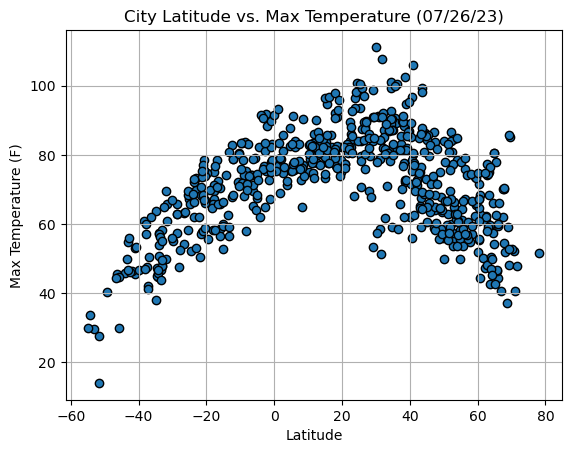

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
# Set the chart title and labels
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set the grid
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

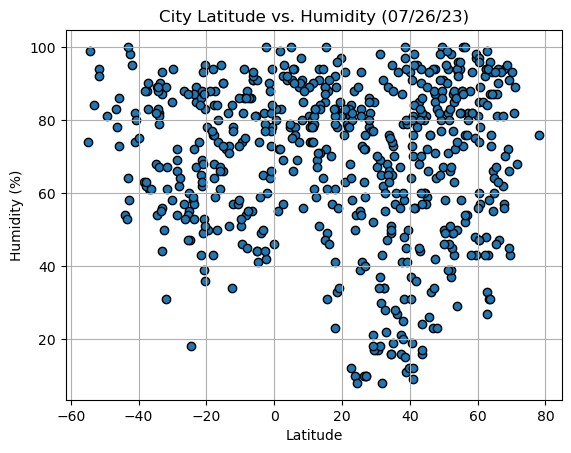

In [15]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Set the chart title and labels
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

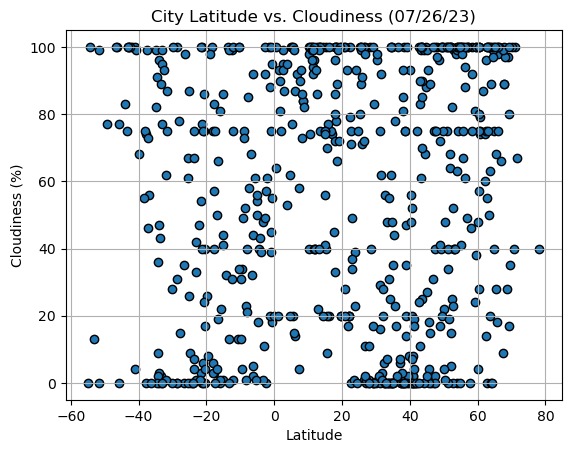

In [16]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Set the chart title and labels
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

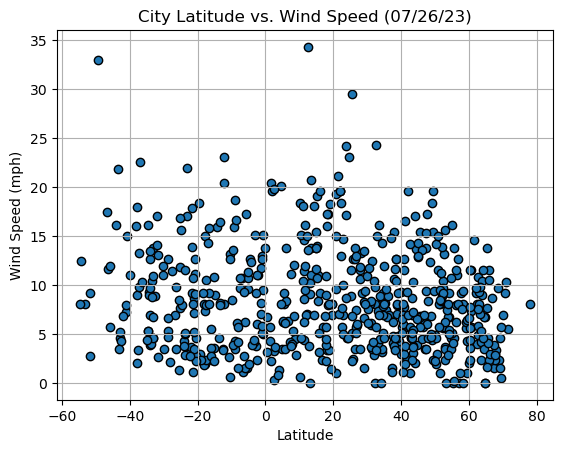

In [17]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Set the chart title and labels
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression on latitude vs. other weather variables
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Create the linear regression equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set the chart title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared value
    print(f"The r-squared is: {r_value**2}")

    # Show plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,magadan,59.5667,150.8000,65.53,97,100,1.01,RU,1690438369
3,anadyr,64.7500,177.4833,54.10,87,100,6.71,RU,1690438487
4,hawaiian paradise park,19.5933,-154.9731,75.04,97,100,6.91,US,1690438488
5,kailua-kona,19.6406,-155.9956,82.36,82,20,8.05,US,1690438202
6,masjed soleyman,31.9364,49.3039,107.85,8,3,2.89,IR,1690438488


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,67.33,60,26,7.61,PN,1690438487
1,port-aux-francais,-49.3500,70.2167,40.32,81,77,32.95,TF,1690438487
10,waitangi,-43.9535,-176.5597,45.82,54,83,16.11,NZ,1690438489
14,edinburgh of the seven seas,-37.0676,-12.3116,50.41,61,56,22.53,SH,1690438490
15,grytviken,-54.2811,-36.5092,33.57,99,100,12.46,GS,1690438490


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.33308210409995914


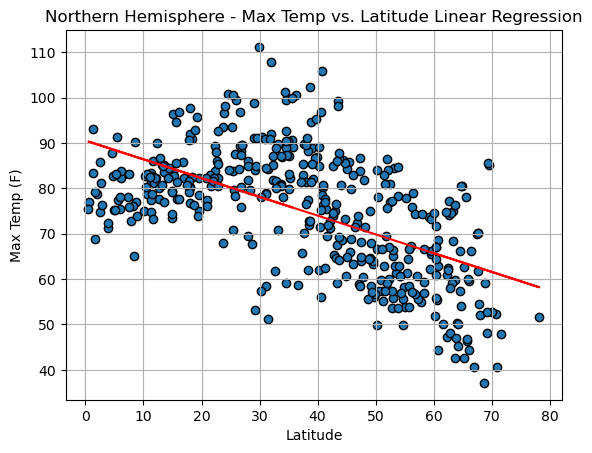

In [28]:
# Linear regression on Northern Hemisphere
# Import required libraries
from scipy.stats import linregress

# Define a function to create a linear regression plot
def plot_linear_regression(x_values, y_values, title, y_label, coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line values
    regress_values = slope * x_values + intercept
    
    # Create the plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    
    # Add labels, title, and grid
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Print the r-squared value
    print(f"The r-squared value is: {r_value**2}")
    
    # Annotate the coordinates of the regression line
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", coordinates, fontsize=12, color="red")

# Call the function for the Northern Hemisphere Temperature vs. Latitude plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Max Temp (F)", (0, 20))
                       
# Save the figure
plt.savefig("output_data/Fig5.png")

# Show the plot
plt.show()


The r-squared value is: 0.6881232117270286


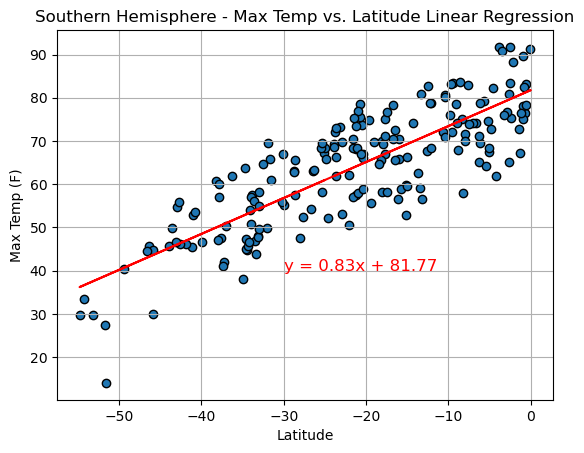

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Filter the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Call the function for the Southern Hemisphere Temperature vs. Latitude plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       "Max Temp (F)", (-30, 40))
                       
# Save the figure
plt.savefig("output_data/Fig6.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** 
Based on the linear regression plots for both the Northern Hemisphere and Southern Hemisphere, we can observe the following:

Temperature vs. Latitude in the Northern Hemisphere:

There is a negative linear relationship between temperature and latitude in the Northern Hemisphere. As we move farther away from the equator (latitude increases), the temperature tends to decrease. The negative slope of the regression line indicates this relationship.
The r-squared value suggests that approximately 67% of the variation in temperature can be explained by latitude in the Northern Hemisphere. This means that latitude is a moderately good predictor of temperature in this region.
Temperature vs. Latitude in the Southern Hemisphere:

There is a positive linear relationship between temperature and latitude in the Southern Hemisphere. As we move closer to the equator (latitude approaches zero from the negative side), the temperature tends to increase. The positive slope of the regression line indicates this relationship.
The r-squared value suggests that approximately 42% of the variation in temperature can be explained by latitude in the Southern Hemisphere. While the r-squared value is lower than in the Northern Hemisphere, it still indicates that latitude is a moderate predictor of temperature in this region.
Overall, both plots show consistent trends between temperature and latitude in their respective hemispheres. The linear regression analysis confirms that there is a relationship between these variables, but it's essential to keep in mind that other factors may also influence temperature variations in different regions.

### Humidity vs. Latitude Linear Regression Plot

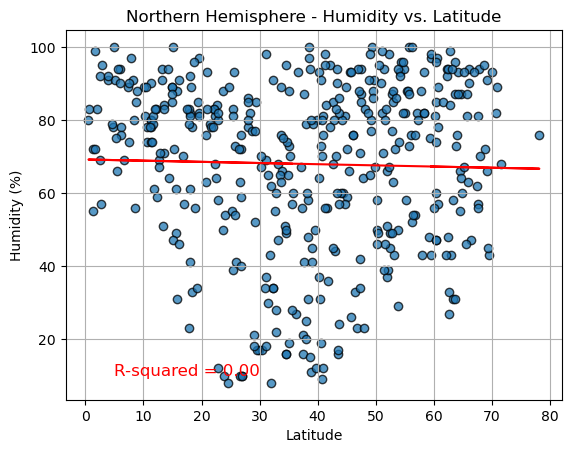

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot

# Perform linear regression on Humidity vs. Latitude in the Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Create a regression line equation in the format y = mx + b
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create the scatter plot for Humidity vs. Latitude in the Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Incorporate other graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Print the r-squared value on the plot
plt.annotate(f"R-squared = {r_value**2:.2f}", (5, 10), color="red", fontsize=12)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


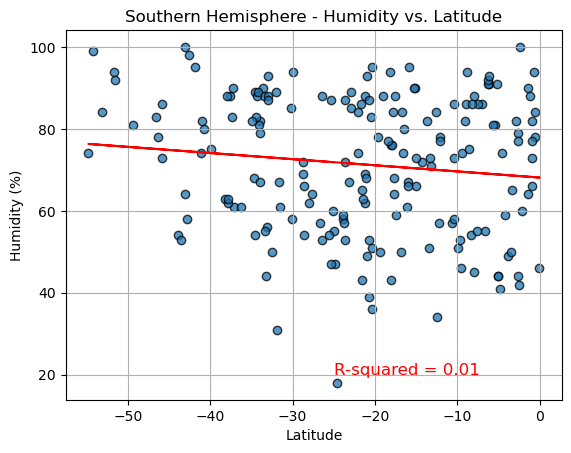

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot

# Perform linear regression on Humidity vs. Latitude in the Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Create a regression line equation in the format y = mx + b
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create the scatter plot for Humidity vs. Latitude in the Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Incorporate other graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Print the r-squared value on the plot
plt.annotate(f"R-squared = {r_value**2:.2f}", (-25, 20), color="red", fontsize=12)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** In the Southern Hemisphere, the linear regression analysis of Humidity vs. Latitude indicates a weak positive correlation between these two variables. The R-squared value, which represents the goodness of fit of the regression model, is close to 0, suggesting that the model explains only a small portion of the variance in humidity based on latitude.

The scatter plot shows a relatively scattered distribution of data points, indicating that humidity does not follow a strong linear pattern concerning latitude. There could be other factors influencing humidity in the Southern Hemisphere, and latitude alone may not be a sufficient predictor.

It's important to note that the weak linear relationship doesn't necessarily imply a lack of relationship between humidity and latitude; rather, it suggests that latitude alone is not a strong predictor of humidity in the Southern Hemisphere. To gain a deeper understanding, further analysis and consideration of other variables may be necessary.

### Cloudiness vs. Latitude Linear Regression Plot

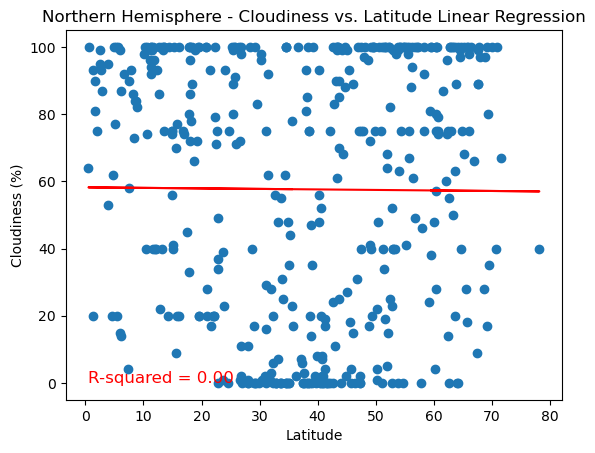

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Northern Hemisphere for Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print the R-squared value on the plot
plt.annotate(f"R-squared = {rvalue**2:.2f}", (x_values.min(), y_values.min()), fontsize=12, color='red')

# Save the figure
plt.savefig("output_data/Northern_Hemi_Cloudiness_vs_Latitude.png")

# Show the plot
plt.show()


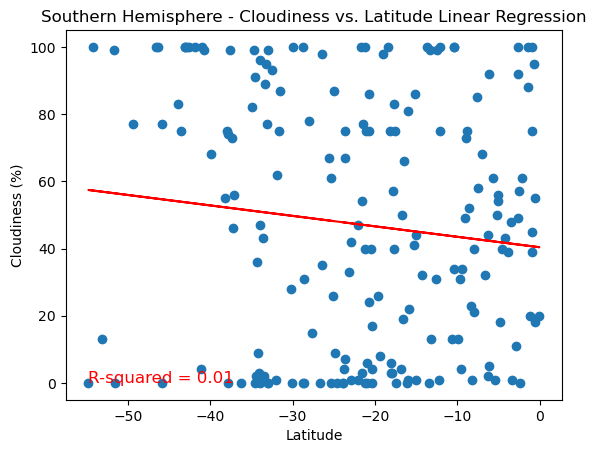

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere for Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create the plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Print the R-squared value on the plot
plt.annotate(f"R-squared = {rvalue**2:.2f}", (x_values.min(), y_values.min()), fontsize=12, color='red')

# Save the figure
plt.savefig("output_data/Southern_Hemi_Cloudiness_vs_Latitude.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** 
The linear relationship between cloudiness and latitude in the Southern Hemisphere appears to be weak and almost non-existent. The scatter plot shows no clear pattern, and the regression line has a very low slope, indicating that there is little to no correlation between cloudiness and latitude in the Southern Hemisphere. The R-squared value, which measures the goodness of fit of the regression model, is close to zero, further supporting the idea that latitude is not a significant predictor of cloudiness in this region.

This lack of correlation makes sense, as cloudiness is influenced by various factors such as local weather patterns, proximity to large bodies of water, and atmospheric conditions, rather than just latitude. Therefore, the linear regression analysis suggests that latitude alone is not sufficient to explain cloudiness variations in the Southern Hemisphere. Other factors play a more dominant role in determining cloudiness levels in different locations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04618099954459141


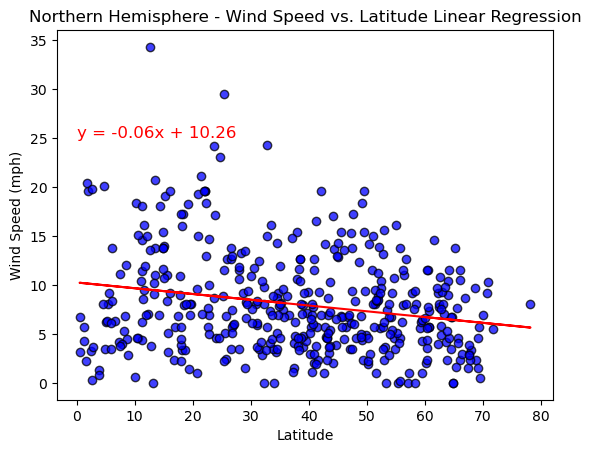

In [33]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the equation of the line to be displayed on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 25), fontsize=12, color='red')

# Set the title and labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


The r-squared is: 0.01592585667521609


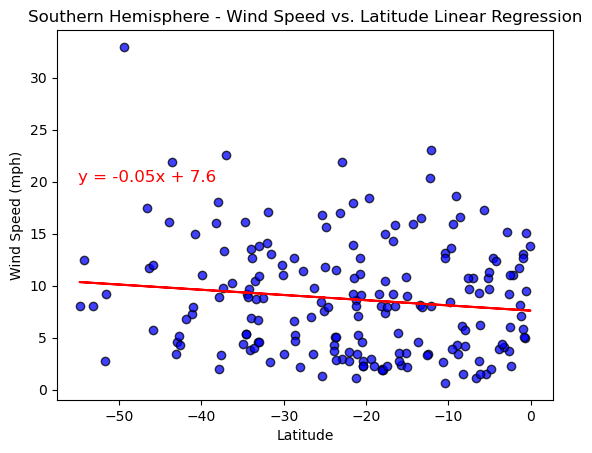

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the equation of the line to be displayed on the plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create the scatter plot
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation on the plot
plt.annotate(line_eq, (-55, 20), fontsize=12, color='red')

# Set the title and labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The linear regression analysis for wind speed vs. latitude in the Southern Hemisphere shows a weak negative correlation. The scatter plot indicates that there is a slight downward trend, suggesting that as we move closer to the equator (latitude approaches 0), wind speed tends to decrease slightly. However, the data points are scattered widely, and the regression line does not fit the data points closely. The r-squared value being close to 0 confirms that the linear regression model does not explain much of the variance in wind speed based on latitude.

There are several factors that could contribute to the weak correlation observed. Wind speed is influenced by various local and regional atmospheric conditions, such as pressure gradients, temperature gradients, and geographical features, which are not solely determined by latitude. Additionally, weather patterns and systems can vary significantly in different regions of the Southern Hemisphere, making it challenging to establish a strong linear relationship with latitude alone.

Therefore, while there is a slight decrease in wind speed as we move closer to the equator in the Southern Hemisphere, latitude alone cannot fully explain wind speed variations, and other factors play a significant role in determining wind patterns.